In [5]:
## Walker Delta constellation propagator under Keplerian assumptions

from astropy import units as u
from astropy.time import TimeDelta
from astropy import coordinates as coord

from poliastro.util import Time
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.twobody.sampling import EpochsArray
from poliastro.twobody.propagation import CowellPropagator


from inc_from_smaecc import required_inc

import numpy as np
import time

from poliastro.plotting import OrbitPlotter3D
from matplotlib import pyplot as plt

# 3 planes, 90 satellite, wd: i:90/3/5, 380km SSO 

process_start_time = time.time()   # start time (instant) of python code
start_date_time = time.ctime()  # start time (clock) of python code
print(f'\n--- WALKER DELTA CONSTELLATION --- [process start: {start_date_time}]\n')

R = (Earth.R).to(u.km)

alt = 380 * u.km
a   = R + alt
ecc = 0.001 * u.one
inc = required_inc(a.value, ecc.value) * u.deg
argp = 0 * u.deg

start_date = Time("2023-01-01 00:00:00.000", scale = "utc")

time_frame = 20 * u.day   #float(input('Time frame [days]: ')) * u.day
time_step  = 3600 * u.s #float(input('Time step [sec]: ')) * u.s

number = int(time_frame.to_value(u.s) / time_step.value)
tofs = TimeDelta(np.linspace(0, time_frame, num=number))

# sensor parameters
sw = 50 * 0.5 # [km]

# Walker Delta pattern --> inc:t/p/f
t = 90     # total number of satellites
p = 3      # orbital planes
f = 0.75   # phasing parameter
delta_nu = f * 360 / t 
s = int(t/p)   # satellites per orbit

sats_orbit_list = []
for plane in range(p):
    raan = (plane * 360 /p) * u.deg

    for sat in range(s):
        nu = (sat*360/s + delta_nu*plane) * u.deg
        orbit_0 = Orbit.from_classical(Earth, a, ecc, inc, raan, argp, nu, start_date)
        ephem = orbit_0.to_ephem(EpochsArray(start_date + tofs, method=CowellPropagator(rtol=1e-5)))
        sats_orbit_list.append(ephem)


print(f'\nProcess finished --- {int(time.time() - process_start_time)}')

# plot
frame = OrbitPlotter3D()

for sat in range(t):
    orbita_0 = Orbit.from_ephem(Earth, sats_orbit_list[sat], sats_orbit_list[0].epochs[0])
    frame.plot(orbita_0)
    
plt.savefig( "Two-Body Trajectory (3D View) for .png" )
plt.show()   # works only in Jupyter


--- WALKER DELTA CONSTELLATION --- [process start: Mon Dec 18 15:25:44 2023]


Process finished --- 23


<Figure size 640x480 with 0 Axes>

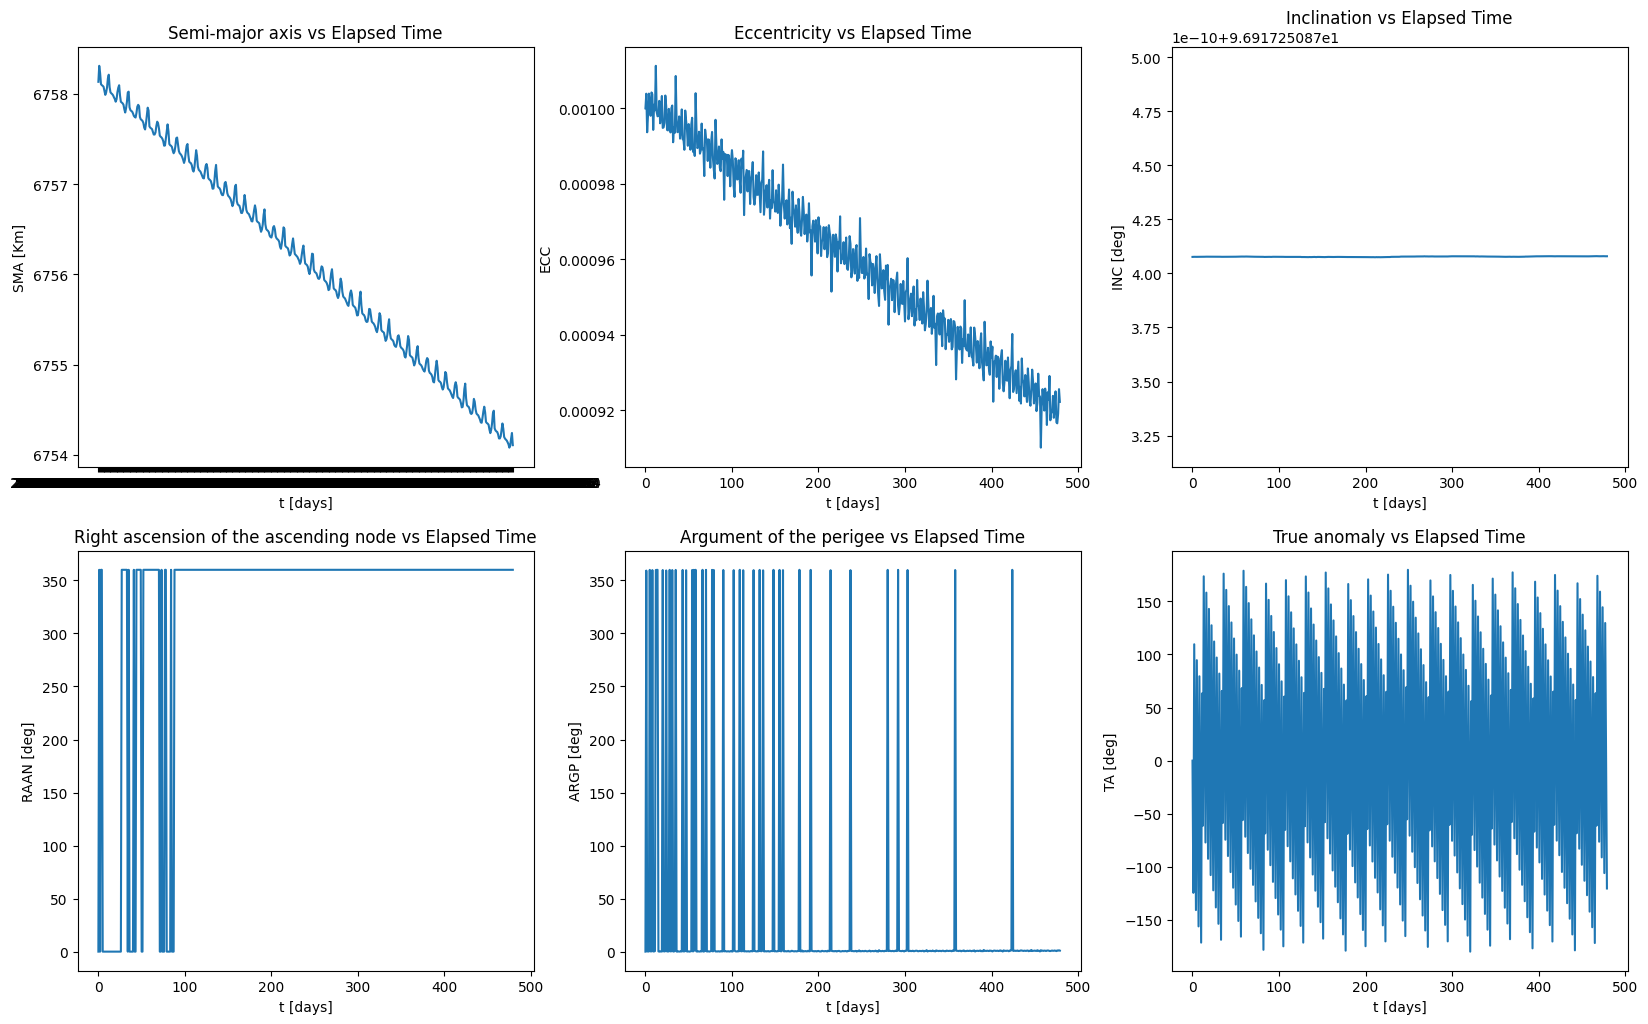

In [6]:
a_list     = []
ecc_list   = []
inc_list   = []
raan_list  = []
argp_list  = []
nu_list    = []
epoch_list = []

for epoch in range(len(tofs)):
    
    a_list.append(Orbit.from_ephem(Earth, sats_orbit_list[0], sats_orbit_list[0].epochs[epoch]).a.value)
    ecc_list.append(Orbit.from_ephem(Earth, sats_orbit_list[0], sats_orbit_list[0].epochs[epoch]).ecc.value)
    inc_list.append(Orbit.from_ephem(Earth, sats_orbit_list[0], sats_orbit_list[0].epochs[epoch]).inc.to_value(u.deg))
    raan_list.append(Orbit.from_ephem(Earth, sats_orbit_list[0], sats_orbit_list[0].epochs[epoch]).raan.to_value(u.deg))
    argp_list.append(Orbit.from_ephem(Earth, sats_orbit_list[0], sats_orbit_list[0].epochs[epoch]).argp.to_value(u.deg))
    nu_list.append(Orbit.from_ephem(Earth, sats_orbit_list[0], sats_orbit_list[0].epochs[epoch]).nu.to_value(u.deg))
    epoch_list.append(Orbit.from_ephem(Earth, sats_orbit_list[0], sats_orbit_list[0].epochs[epoch]).epoch.value)

fig, ax = plt.subplots(2,3, figsize=(20,12))
ax[0,0].plot(epoch_list, a_list)
ax[0,0].set(title = "Semi-major axis vs Elapsed Time",
       xlabel = "t [days]",
       ylabel = "SMA [Km]")

ax[0,1].plot(range(len(a_list)), ecc_list)
ax[0,1].set(title = "Eccentricity vs Elapsed Time",
       xlabel = "t [days]",
       ylabel = "ECC")

ax[0,2].plot(range(len(a_list)), inc_list)
ax[0,2].set(title = "Inclination vs Elapsed Time",
       xlabel = "t [days]",
       ylabel = "INC [deg]")

ax[1,0].plot(range(len(a_list)), raan_list)
ax[1,0].set(title = "Right ascension of the ascending node vs Elapsed Time",
       xlabel = "t [days]",
       ylabel = "RAAN [deg]")

ax[1,1].plot(range(len(a_list)), argp_list)
ax[1,1].set(title = "Argument of the perigee vs Elapsed Time",
       xlabel = "t [days]",
       ylabel = "ARGP [deg]")

ax[1,2].plot(range(len(a_list)), nu_list)
ax[1,2].set(title = "True anomaly vs Elapsed Time",
       xlabel = "t [days]",
       ylabel = "TA [deg]")

plt.show()